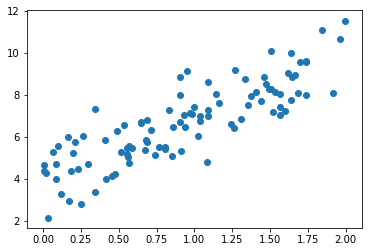

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Etape 1: generer les datas: 

x=2 * np.random.rand(100,1)
y=4 + 3 * x + np.random.randn(100,1)

plt.scatter(x,y)

In [58]:
#Construction de la variable X en concatenant 1 
X_b=np.c_[np.ones((100,1)), x]
# Entrainement du modele avec l'Equation Normale: Derivation Matricielle
# le facteur B: (X`X)^-1 . X`.y (X`=X^t)
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[ 3.97267552]
 [ 2.91201782]]


In [59]:
# Predictions a l'aide de Theta (Beta): 
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # add x0=I_2
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.97267552],
       [ 9.79671116]])

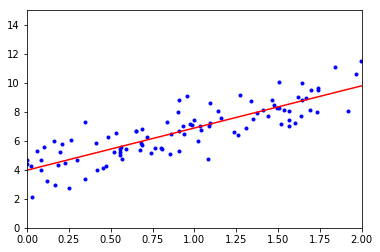

In [60]:
# Affichage du modele lineaire et data: 
plt.plot(x,y,"b.")
plt.plot(X_new,y_predict, "r-") # red line
plt.axis([0,2,0,15]) #xmin, xmax, ymin, ymax
plt.show()


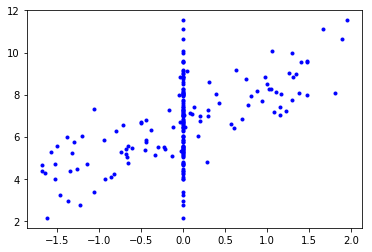

In [65]:
# Normalisation: 
#qd une variable beta1 par ex, est plus petite que beta2, l'algo de la descente s'attend a 
#une variation bcp plus important de beta1 pour affecter la fonction cout. la convergence
# mettra bcp plus de temps.
# FAUT tjrs avoir le meme echelle de tous les variables: NORMALISATION: 

#avec NumPy:
Eps=0.000001
X_norm = (X_b - X_b.mean(axis=0)) / (X_b.std(axis=0)+ Eps) 
# attention:Eps=0 on aura division par Zero;

plt.plot(X_norm,y,"b.")

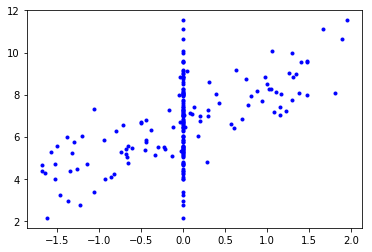

In [70]:
# Normalisation avec: Scikit_learn: 

from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
X_norm=Scaler.fit_transform(X_b)
plt.plot(X_norm,y,"b.")

In [77]:
lin_reg.fit(X_norm,y)
lin_reg.intercept_, lin_reg.coef_ #  cste (B0) &  poids (Bi)
# Normaliser avec Transform !!! et prediction: 
X_norm_b=Scaler.transform(X_new_b)
Y_predict_new=lin_reg.predict(X_norm_b) 
Y_predict_new

array([[ 3.97267552],
       [ 9.79671116]])

In [81]:
eta=0.01 # taux d'apprentissage 
n_iteration=1000
m=100 # nombre d'observation qui suit la dimension du X_b la haut !!
theta= np.random.randn(2,1) # initialisation aleatoire; 
for i in range(n_iteration):
    gradients= 2/m * X_norm.T.dot(X_norm.dot(theta) - y )
    theta= theta - eta * gradients
theta

array([[ 0.88333243],
       [ 1.60473691]])